In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries
import numpy as np # numpy is used for numerical operations.
import matplotlib.pyplot as plt #matplotlib.pyplot is used to make graphs and plots.
import pandas as pd # Pandas is used to read data from files and work with tables (called DataFrames).

In [3]:
#reads the CSV file named Salary_Data.csv and stores it in the variable data using pandas.
data = pd.read_csv('Salary_Data.csv')

In [4]:
data  #content of the data variable

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
independent = data[["YearsExperience"]] #Indepedent Variable,years of Experience, datatype float
dependent = data[["Salary"]] # Depedent Variable, Salary, datatype float

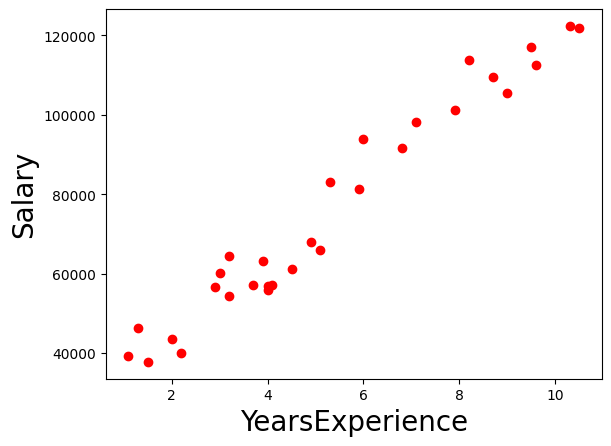

In [6]:
# create a scatter plot to show the relationship between years of experience and salary
plt.scatter(independent,dependent ,c ='r')
plt.xlabel('YearsExperience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

In [7]:
# splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent,dependent, test_size = 1/3, random_state = 0)

In [8]:
y_test #target values for testing

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0
22,101302.0


In [9]:
#creating a Linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [10]:
# Viewing the b1 and bo value
weight=regressor.coef_
print("Weight of the model={}".format(weight))
bais=regressor.intercept_
print("Intercept of the model={}".format(bais))

Weight of the model=[[9345.94244312]]
Intercept of the model=[26816.19224403]


In [11]:
y_pred=regressor.predict(X_test)

In [12]:
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [13]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [14]:
r_score

0.9749154407708353

In [15]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [16]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.predict([[15]])
print(result)

[[167005.32889087]]


In [17]:
prediction_input=int(input("Enter the Prediction input value:"))

Enter the Prediction input value: 45000


In [19]:
Future_Prediction=regressor.predict([[prediction_input]])
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[[4.20594226e+08]]
